In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib

In [28]:
h_c = 6.626*10**(-27)   #Planck's Constant
c_c = 3.*10**8          #Speed of light
k_B = 1.38*10**(-16)    #Boltzmann Constant
conv = 10**(-9)         #Convergence from nm to m

T_min = 800
T_max = 1500
T_list = np.linspace(T_min,T_max,10)
print T_list
def planck(wl,temperature):
    wl = wl*10**(-10)
    front = 2*h_c*c_c**2/wl**5
    exp = h_c*c_c/(wl*k_B*temperature)
    return front*1/(np.exp(exp)-1)

x = np.arange(1,300000,1)
print x
planck_func = planck(x,1)

for i in range(len(T_list)):
    planck_func += planck(x,T_list[i])
planck_func /= np.sum(planck_func)
print planck_func[20000]
print np.linspace(T_min,T_max,1)

[ 800.          877.77777778  955.55555556 1033.33333333 1111.11111111
 1188.88888889 1266.66666667 1344.44444444 1422.22222222 1500.        ]
[     1      2      3 ... 299997 299998 299999]


/home/lynge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


2.7576037246844882e-05
[800.]


In [53]:
wien1500 = planck(x,1500) / np.sum(planck(x,1500))
wien3000 = planck(x,3000) / np.sum(planck(x,3000))
wien1200 = planck(x,1300) / np.sum(planck(x,1300))
wien1000 = planck(x,1000) / np.sum(planck(x,1000))
wien800 = planck(x,800) / np.sum(planck(x,800))

/home/lynge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


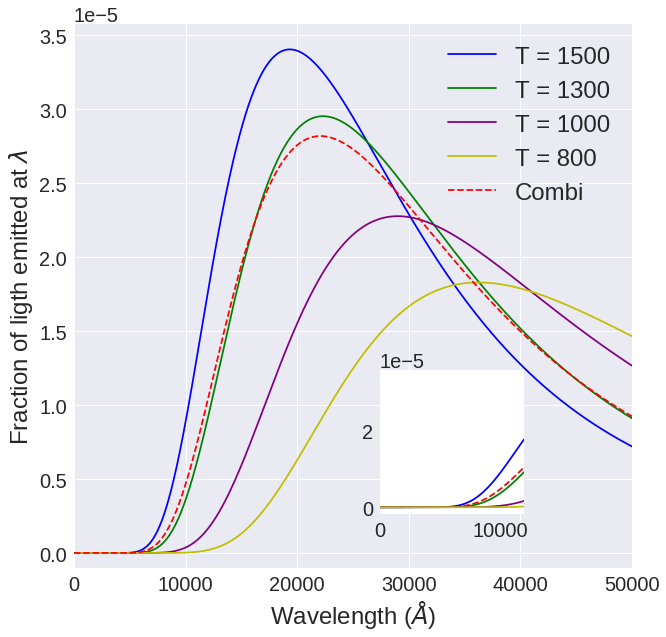

In [55]:
plt.figure(figsize=(10,10))

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

plt.axis([0,50000,-1e-6,np.max(wien1500)*1.05])
plt.plot(x,wien1500,color='b',label='T = 1500')
plt.plot(x,wien1200,color='g',label='T = 1300')
plt.plot(x,wien1000,color='purple',label='T = 1000')
plt.plot(x,wien800,color='y',label='T = 800')
plt.plot(x,planck_func,linestyle='--',color='r',label='Combi')

plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))


#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)

plt.legend(fontsize=24)
plt.xlabel('Wavelength ($\AA$)',fontsize=24)
plt.ylabel('Fraction of ligth emitted at $\lambda$',fontsize=24)

a = plt.axes([0.55,0.2,0.2,0.2],facecolor='white')
plt.plot(x,planck_func,linestyle='--',color='r',label='Combi')
plt.plot(x,wien1500,color='b',label='1500')
plt.plot(x,wien1200,color='g',label='1300')
plt.plot(x,wien1000,color='purple',label='1000')
plt.plot(x,wien800,color='y',label='800')
plt.xlim([0,12000])
plt.ticklabel_format(axis='y',style='sci',scilimits=(-2,2))
#plt.xlim([0,50000])
#plt.yscale('log')
#plt.yscale('log')
#plt.ylim([1e10,1e30])
plt.show()